<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Prepare Data</a></span><ul class="toc-item"><li><span><a href="#Heart-Data" data-toc-modified-id="Heart-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Heart Data</a></span></li><li><span><a href="#Plot-Data" data-toc-modified-id="Plot-Data-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Plot Data</a></span></li><li><span><a href="#Plot-Kernels" data-toc-modified-id="Plot-Kernels-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Plot Kernels</a></span></li></ul></li><li><span><a href="#BEMKL" data-toc-modified-id="BEMKL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>BEMKL</a></span><ul class="toc-item"><li><span><a href="#Non-Sparse" data-toc-modified-id="Non-Sparse-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Non-Sparse</a></span></li><li><span><a href="#Kernel-Sparse" data-toc-modified-id="Kernel-Sparse-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Kernel-Sparse</a></span></li><li><span><a href="#Data-Sparse" data-toc-modified-id="Data-Sparse-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Data-Sparse</a></span></li><li><span><a href="#Cross-Validation" data-toc-modified-id="Cross-Validation-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Cross Validation</a></span></li><li><span><a href="#Sparsity-Plots" data-toc-modified-id="Sparsity-Plots-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Sparsity Plots</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import scipy as sc
from scipy.io import loadmat
import numpy as np

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import polynomial_kernel

from matplotlib import pyplot as plt
%matplotlib inline

import time
import util
from util import *
import plot
import bemkl_binary


np.random.seed(123)

# Prepare Data

1. Features: 
   - kernel of all features
   - kernel of each feature
   - gaussian, polynomial 
2. Features preprocessing:
   - normalization of the features
   - spherical normalization of kernel matrices
3. Kernel Preprocessing


## Heart Data

In [2]:
reload(util)

X_heart, y_heart  = util.get_heart_data()
X_heart = util.preprocess_feats(X_heart)


N = int(X_heart.shape[0]*.75)

K_heart = util.get_kernels(X_heart, poly=True, feat_kernel=True, gauss=True, max_gauss_width=3, min_gauss_width=-1)

K_heart = util.preprocess_kernel(K_heart)
K, K_test = K_heart[:,:N,:N],K_heart[:,N:,:N]
y, y_test = y_heart[:N], y_heart[N:]

print 'Number of Kernels:', K.shape[0]
print 'Data Points:', X_heart.shape[0]
print 'Training Points:', N

Number of Kernels: 112
Data Points: 920
Training Points: 690


## Plot Data

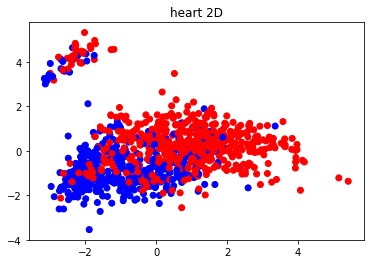

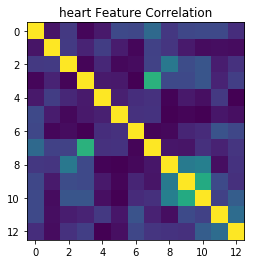

In [3]:
plot.plot_data(X_heart,y_heart, 'heart')

## Plot Kernels

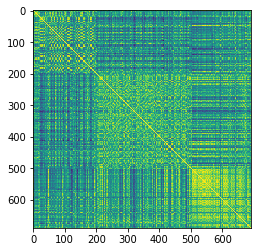

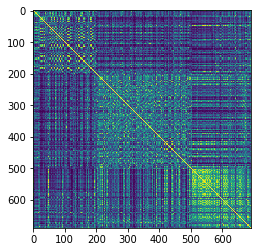

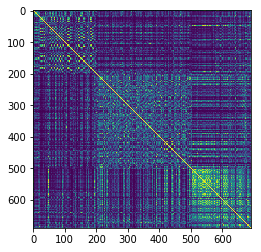

In [5]:
for i in range(3):
    plot.plot_kernel(K[i,...],'heart_k%d'%i)

# BEMKL

## Non-Sparse

In [3]:
### One time Evaluation 

nsp_clf = bemkl_binary.BEMKL(sparse=False)

t1 = time.time()

nsp_clf.bemkl_binary(K,y)

t2 = time.time()
diff = t2 - t1

pred, prob = nsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.8260869565217391
Training Time: 32.0509090424


## Kernel-Sparse

In [4]:
sp_clf = bemkl_binary.BEMKL(sparse=True)

t1 = time.time()

sp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = sp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.808695652173913
Training Time: 36.8421909809


In [5]:
sp_clf.report_results()

Nmber of Chosen Kernels:
19
Nmber of Chosen Points:
349


## Data-Sparse

In [6]:
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)

t1 = time.time()

dsp_clf.bemkl_binary(K,y)


t2 = time.time()
diff = t2 - t1

pred, prob = dsp_clf.predict(K_test)

print 'Accuracy:'
print (pred==y_test).sum()*1./y_test.shape[0]
print 'Training Time:', diff

Accuracy:
0.8217391304347826
Training Time: 33.7461102009


In [7]:
dsp_clf.report_results()

Nmber of Chosen Kernels:
104
Nmber of Chosen Points:
131


## Cross Validation

In [ ]:
print 'Cross Validation Results for Non-Sparse model:'
#nsp_clf = bemkl_binary.BEMKL(sparse=False)
#nsp_clf.evaluate_model(K_heart,y_heart)

print 'Cross Validation Results for Kernel-Sparse model:'
sp_clf = bemkl_binary.BEMKL(sparse=True)
sp_clf.evaluate_model(K_heart,y_heart)

print 'Cross Validation Results for Data-Sparse model:'
dsp_clf = bemkl_binary.BEMKL(data_sparse=True)
dsp_clf.evaluate_model(K_heart,y_heart)

## Sparsity Plots

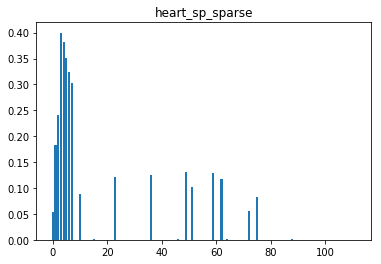

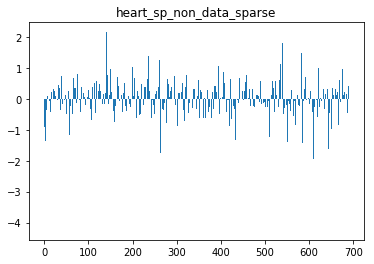

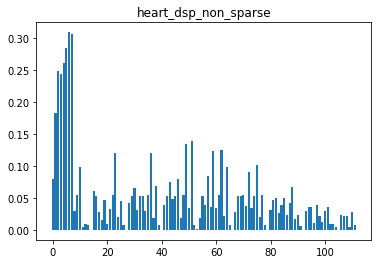

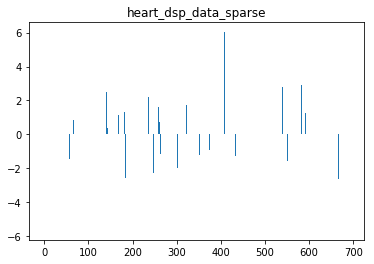

In [8]:
plot.plot_results(sp_clf, 'heart_sp')
plot.plot_results(dsp_clf, 'heart_dsp')